In [47]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [48]:
# Load the dataset as an Excel file
df = pd.read_csv('/Assignment-dataset.csv')

# Preliminary data-analysis and Data Preparation

In [49]:
df.head()

,Class,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a38,a39,a40,a41,a42,a43,a44,a45,a46,a47
0,False,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,False,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,False,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,False,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,False,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [50]:
df.shape

(9841, 48)

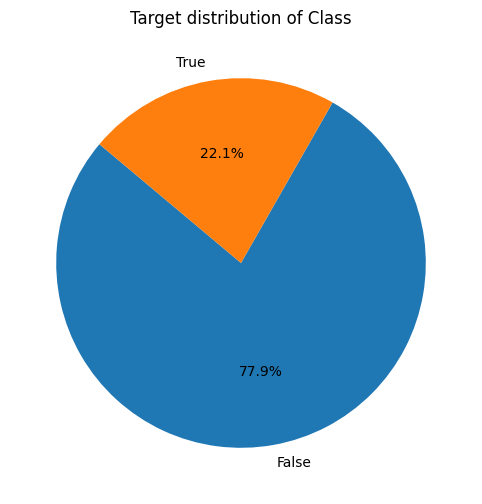

In [52]:
import matplotlib.pyplot as plt

# Calculate class counts
class_counts = df['Class'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    class_counts.values,
    labels=class_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#1f77b4', '#ff7f0e']
)
plt.title('Target distribution of Class')
plt.show()

In [53]:
# Check for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

# Combine into a single DataFrame
summary = pd.DataFrame({'Missing Values': missing_values, 'Data Type': data_types})

# Display the result
print(summary)

       Missing Values Data Type
Class               0      bool
a1                  0   float64
a2                  0   float64
a3                  0   float64
a4                  0     int64
a5                  0     int64
a6                  0     int64
a7                  0     int64
a8                  0     int64
a9                  0   float64
a10                 0   float64
a11                 0   float64
a12                 0   float64
a13                 0   float64
a14                 0   float64
a15                 0   float64
a16                 0   float64
a17                 0   float64
a18                 0     int64
a19                 0   float64
a20                 0   float64
a21                 0   float64
a22                 0   float64
a23               829   float64
a24               829   float64
a25               829   float64
a26               829   float64
a27               829   float64
a28               829   float64
a29               829   float64
a30     

In [54]:
# Encode Categorical Features with data type as 'object'
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

In [55]:
# Convert boolean columns to integers
df['Class'] = df['Class'].astype(int)

In [56]:
# Separating label from the entire dataset
label = df['Class']
feat = df.drop(columns=['Class'])

In [57]:
# Impute missing values with mean for numerical features
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
feat_final = imputer.fit_transform(feat)

In [58]:
# Convert the NumPy array back to a DataFrame with original column names
feat_final = pd.DataFrame(feat_final, columns=feat.columns)

In [59]:
# Check for missing values in feat
missing_values_feat = feat_final.isnull().sum()

# Display missing values for each column
print(missing_values_feat)

a1     0
a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
a17    0
a18    0
a19    0
a20    0
a21    0
a22    0
a23    0
a24    0
a25    0
a26    0
a27    0
a28    0
a29    0
a30    0
a31    0
a32    0
a33    0
a34    0
a35    0
a36    0
a37    0
a38    0
a39    0
a40    0
a41    0
a42    0
a43    0
a44    0
a45    0
a46    0
a47    0
dtype: int64


In [60]:
feat_final.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a38,a39,a40,a41,a42,a43,a44,a45,a46,a47
0,844.26,1093.71,704785.63,721.0,89.0,0.0,40.0,118.0,0.000000,45.806785,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,63.0,299.0
1,12709.07,2958.44,1218216.73,94.0,8.0,0.0,5.0,14.0,0.000000,2.613269,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,154.0,257.0
2,246194.54,2434.02,516729.30,2.0,10.0,0.0,10.0,2.0,0.113119,1.165453,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,301.0,435.0
3,10219.60,15785.09,397555.90,25.0,9.0,0.0,7.0,13.0,0.000000,500.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,216.0,435.0
4,36.61,10707.77,382472.42,4598.0,20.0,1.0,7.0,19.0,0.000000,12.802411,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,237.0,154.0


In [61]:
label.head()

,Class
0,0
1,0
2,0
3,0
4,0


# Subsets

### Manual selection of attributes (Droping columns with only 0 as their values)

In [62]:
manual_drop = ['a15', 'a16', 'a17', 'a21', 'a31', 'a32', 'a33', 'a34', 'a41', 'a42', 'a43']
feat_manual = feat_final.drop(columns=manual_drop)
feat_manual.to_csv('feat_manual_subset.csv', index=False)

In [63]:
# Print the feature list in feat_manual
print("Feature list in feat_manual:", feat_manual.columns.tolist())

Feature list in feat_manual: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a18', 'a19', 'a20', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40', 'a44', 'a45', 'a46', 'a47']


### Information Gain-based Selection: Select top 25 attributes with highest information gain

In [64]:
selector_ig = SelectKBest(mutual_info_classif, k=25).fit(feat_final.fillna(0), label)  # Fill NaNs for calculation
feat_info_gain = feat_final.loc[:, selector_ig.get_support()]
feat_info_gain.to_csv('feat_info_gain_subset.csv', index=False)

In [65]:
# Print the feature list in feat_manual
print("Feature list in feat_manual:", feat_info_gain.columns.tolist())

Feature list in feat_manual: ['a3', 'a7', 'a10', 'a11', 'a18', 'a20', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40', 'a44', 'a45', 'a46', 'a47']


### Correlation-based Selection: Select top 10 attributes with highest correlation to the target

In [66]:
correlations = feat_final.corrwith(label.astype(int))
correlated_features = correlations.abs().sort_values(ascending=False).head(20).index
feat_correlation = feat_final[correlated_features]
feat_correlation.to_csv('feat_correlation_subset.csv', index=False)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



In [67]:
# Print the feature list in feat_manual
print("Feature list in feat_manual:", feat_correlation.columns.tolist())

Feature list in feat_manual: ['a47', 'a3', 'a2', 'a18', 'a5', 'a4', 'a46', 'a14', 'a8', 'a7', 'a1', 'a13', 'a9', 'a23', 'a38', 'a40', 'a39', 'a25', 'a10', 'a27']


# Manual subset

### XGBOOST

In [68]:
# Split the Dataset into train and test set in 70:30 ratio
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(feat_manual, label, test_size=0.3, random_state=42, stratify=label)


Accuracy: 0.993

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2299
           1       1.00      0.97      0.98       654

    accuracy                           0.99      2953
   macro avg       0.99      0.99      0.99      2953
weighted avg       0.99      0.99      0.99      2953



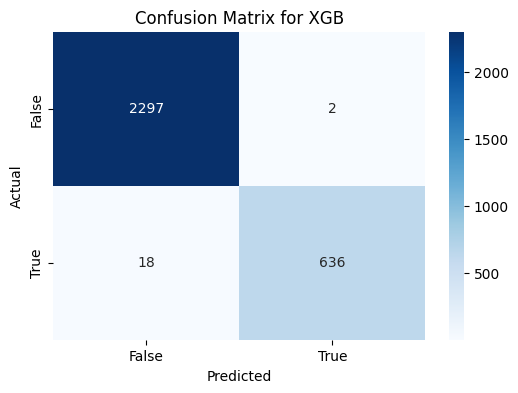

True Positives (TP): 636
False Positives (FP): 2
True Negatives (TN): 2297
False Negatives (FN): 18


In [69]:
# Initialize and Train the XGBoost Classifier
from xgboost import XGBClassifier
xgb1 = XGBClassifier(random_state=50, n_estimators=50, eval_metric='logloss')
xgb1.fit(X_train_1, y_train_1)

# Make Predictions
label_pred_1 = xgb1.predict(X_test_1)

# Calculate Accuracy and Classification Report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_xgb_1 = accuracy_score(y_test_1, label_pred_1)
report_xgb_1 = classification_report(y_test_1, label_pred_1)
print(f"\nAccuracy: {accuracy_xgb_1:.3f}")
print("\nClassification Report:\n", report_xgb_1)

conf_matrix = confusion_matrix(y_test_1, label_pred_1)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGB')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test_1, label_pred_1).ravel()

# Print TP, FP, TN, FN
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

### KNN


Accuracy: 0.920

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2299
           1       0.86      0.76      0.81       654

    accuracy                           0.92      2953
   macro avg       0.90      0.86      0.88      2953
weighted avg       0.92      0.92      0.92      2953



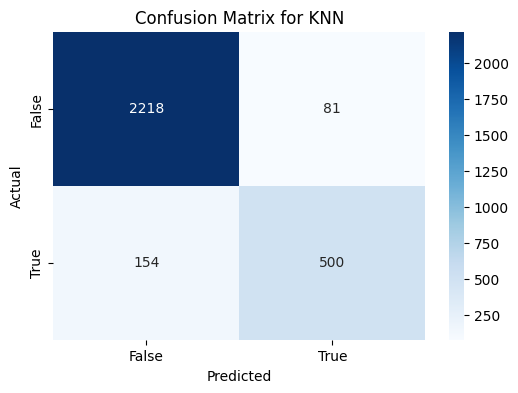

True Positives (TP): 500
False Positives (FP): 81
True Negatives (TN): 2218
False Negatives (FN): 154


In [70]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train_1, y_train_1)

# Predictions and evaluation
label_knn_1 = knn1.predict(X_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, label_knn_1)
report_knn_1 = classification_report(y_test_1, label_knn_1)
print(f"\nAccuracy: {accuracy_knn_1:.3f}")
print("\nClassification Report for KNN:\n", report_knn_1)

conf_matrix = confusion_matrix(y_test_1, label_knn_1)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test_1, label_knn_1).ravel()

# Print TP, FP, TN, FN
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

### DECISION TREE


Accuracy: 0.984

Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2299
           1       0.96      0.97      0.96       654

    accuracy                           0.98      2953
   macro avg       0.98      0.98      0.98      2953
weighted avg       0.98      0.98      0.98      2953



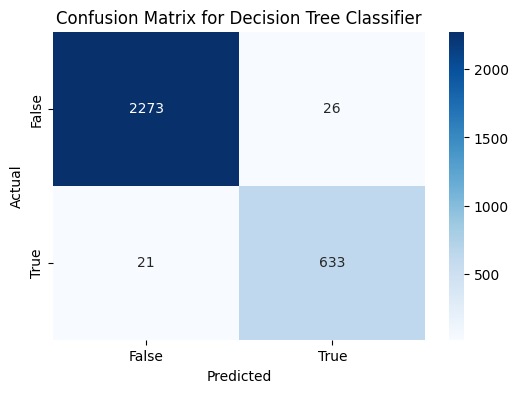

True Positives (TP): 633
False Positives (FP): 26
True Negatives (TN): 2273
False Negatives (FN): 21


In [71]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_train_1, y_train_1)

# Make predictions on the test set
label_dt_1 = dt1.predict(X_test_1)

accuracy_dt_1 = accuracy_score(y_test_1, label_dt_1)
report_dt_1 = classification_report(y_test_1, label_dt_1)
print(f"\nAccuracy: {accuracy_dt_1:.3f}")
print("\nClassification Report for Decision Tree Classifier:\n", report_dt_1)

conf_matrix = confusion_matrix(y_test_1, label_dt_1)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test_1, label_dt_1).ravel()

# Print TP, FP, TN, FN
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Information Gain Subset

In [72]:
# Split the Dataset
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(feat_info_gain, label, test_size=0.3, random_state=42, stratify=label)

### XGBOOST


Accuracy: 0.993

Classification Report for XGB:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2299
           1       0.99      0.98      0.98       654

    accuracy                           0.99      2953
   macro avg       0.99      0.99      0.99      2953
weighted avg       0.99      0.99      0.99      2953



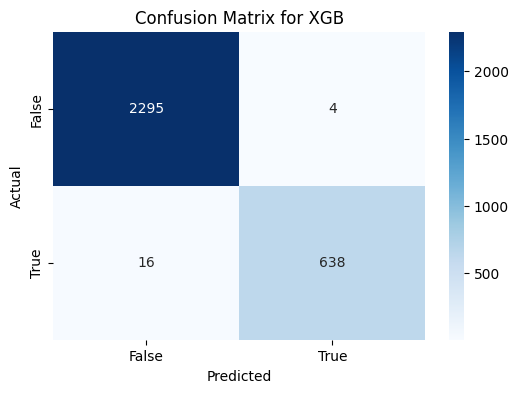

True Positives (TP): 638
False Positives (FP): 4
True Negatives (TN): 2295
False Negatives (FN): 16


In [73]:
# Initialize and Train the XGBoost Classifier
xgb2 = XGBClassifier(random_state=50, n_estimators=50, eval_metric='logloss')
xgb2.fit(X_train_2, y_train_2)

# Make Predictions
label_xgb_2 = xgb2.predict(X_test_2)

# Calculate Accuracy and Classification Report
accuracy_xgb_2 = accuracy_score(y_test_2, label_xgb_2)
report_xgb_2 = classification_report(y_test_2, label_xgb_2)
print(f"\nAccuracy: {accuracy_xgb_2:.3f}")
print("\nClassification Report for XGB:\n", report_xgb_2)

conf_matrix = confusion_matrix(y_test_2, label_xgb_2)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGB')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test_2, label_xgb_2).ravel()

# Print TP, FP, TN, FN
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

### KNN


Accuracy: 0.920

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2299
           1       0.83      0.71      0.77       654

    accuracy                           0.90      2953
   macro avg       0.87      0.84      0.85      2953
weighted avg       0.90      0.90      0.90      2953



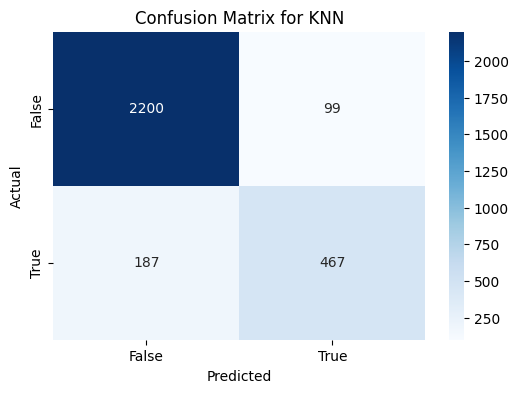

True Positives (TP): 467
False Positives (FP): 99
True Negatives (TN): 2200
False Negatives (FN): 187


In [74]:
# Initialize and train the model
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_2, y_train_2)

# Predictions and evaluation
label_knn_2 = knn2.predict(X_test_2)

# Calculate Accuracy and Classification Report
accuracy_knn_2 = accuracy_score(y_test_2, label_knn_2)
report_knn_2 = classification_report(y_test_2, label_knn_2)
print(f"\nAccuracy: {accuracy_knn_1:.3f}")
print("\nClassification Report for KNN:\n", report_knn_2)

conf_matrix = confusion_matrix(y_test_2, label_knn_2)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test_2, label_knn_2).ravel()

# Print TP, FP, TN, FN
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

### DECISION TREE


Accuracy: 0.987

Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2299
           1       0.97      0.98      0.97       654

    accuracy                           0.99      2953
   macro avg       0.98      0.98      0.98      2953
weighted avg       0.99      0.99      0.99      2953



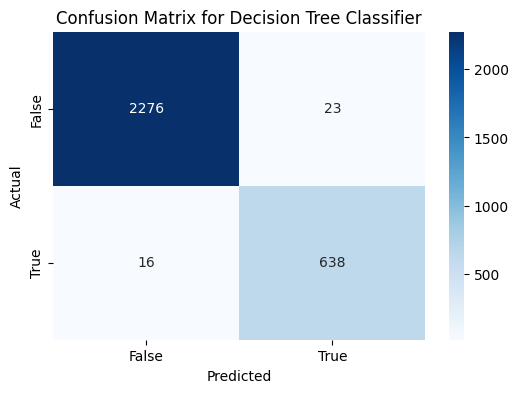

True Positives (TP): 638
False Positives (FP): 23
True Negatives (TN): 2276
False Negatives (FN): 16


In [75]:
# Initialize and train the model
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(X_train_2, y_train_2)

# Make predictions on the test set
label_dt_2 = dt2.predict(X_test_2)

# Calculate Accuracy and Classification Report
accuracy_dt_2 = accuracy_score(y_test_2, label_dt_2)
report_dt_2 = classification_report(y_test_2, label_dt_2)
print(f"\nAccuracy: {accuracy_dt_2:.3f}")
print("\nClassification Report for Decision Tree Classifier:\n", report_dt_2)

conf_matrix = confusion_matrix(y_test_2, label_dt_2)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test_2, label_dt_2).ravel()

# Print TP, FP, TN, FN
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Corelation subset

In [76]:
# Split the Dataset
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(feat_correlation, label, test_size=0.3, random_state=42, stratify=label)

### XGBOOST


Accuracy: 0.993

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2299
           1       0.99      0.98      0.98       654

    accuracy                           0.99      2953
   macro avg       0.99      0.99      0.99      2953
weighted avg       0.99      0.99      0.99      2953



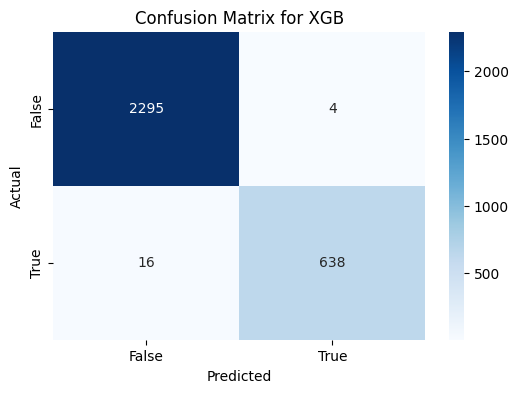

True Positives (TP): 638
False Positives (FP): 4
True Negatives (TN): 2295
False Negatives (FN): 16


In [77]:
# Initialize and Train the XGBoost Classifier
xgb3 = XGBClassifier(random_state=50, n_estimators=50, eval_metric='logloss')
xgb3.fit(X_train_3, y_train_3)

# Make Predictions
label_pred_3 = xgb3.predict(X_test_3)

# Calculate Accuracy and Classification Report
accuracy_xgb_3 = accuracy_score(y_test_3, label_pred_3)
report_xgb_3 = classification_report(y_test_3, label_pred_3)
print(f"\nAccuracy: {accuracy_xgb_3:.3f}")
print("\nClassification Report:\n", report_xgb_3)

conf_matrix = confusion_matrix(y_test_3, label_pred_3)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGB')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test_3, label_pred_3).ravel()

# Print TP, FP, TN, FN
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

### KNN


Accuracy: 0.924

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      2299
           1       0.87      0.78      0.82       654

    accuracy                           0.92      2953
   macro avg       0.90      0.87      0.89      2953
weighted avg       0.92      0.92      0.92      2953



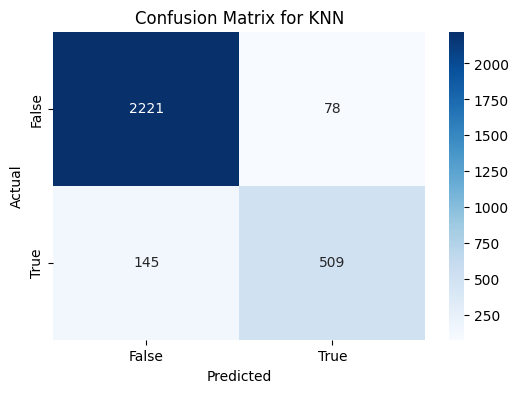

True Positives (TP): 509
False Positives (FP): 78
True Negatives (TN): 2221
False Negatives (FN): 145


In [78]:
# Initialize and train the model
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train_3, y_train_3)

# Predictions and evaluation
label_knn_3 = knn3.predict(X_test_3)

# Calculate Accuracy and Classification Report
accuracy_knn_3 = accuracy_score(y_test_3, label_knn_3)
report_knn_3 = classification_report(y_test_3, label_knn_3)
print(f"\nAccuracy: {accuracy_knn_3:.3f}")
print("\nClassification Report for KNN:\n", report_knn_3)

conf_matrix = confusion_matrix(y_test_3, label_knn_3)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test_3, label_knn_3).ravel()

# Print TP, FP, TN, FN
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

### DECISION TREE


Accuracy: 0.985

Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2299
           1       0.96      0.97      0.97       654

    accuracy                           0.99      2953
   macro avg       0.98      0.98      0.98      2953
weighted avg       0.99      0.99      0.99      2953



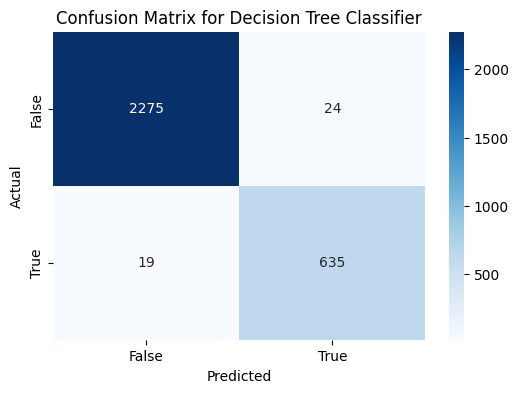

True Positives (TP): 635
False Positives (FP): 24
True Negatives (TN): 2275
False Negatives (FN): 19


In [79]:
# Initialize and train the model
dt3 = DecisionTreeClassifier(random_state=42)
dt3.fit(X_train_3, y_train_3)

# Make predictions on the test set
label_dt_3 = dt3.predict(X_test_3)

# Calculate Accuracy and Classification Report
accuracy_dt_3 = accuracy_score(y_test_3, label_dt_3)
report_dt_3 = classification_report(y_test_3, label_dt_3)
print(f"\nAccuracy: {accuracy_dt_3:.3f}")
print("\nClassification Report for Decision Tree Classifier:\n", report_dt_3)

conf_matrix = confusion_matrix(y_test_3, label_dt_3)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test_3, label_dt_3).ravel()

# Print TP, FP, TN, FN
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")